In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture
from skbayes.mixture_models import VBBMM

In [3]:
import seaborn as sns
sns.set(color_codes=True)

# Preprocess

In [4]:
targetDir = "../data/output/result/"
speedDir = "../data/output/speed/"
brakeDir = "../data/output/brake/"
accelDIr = "../data/output/accel/"
steeringPositiveDir = "../data/output/steeringPositive/"
steeringNegativeDir = "../data/output/steeringNegative/"
segmentDir = "../data/output/segment/"

In [45]:
df1 = pd.read_csv(speedDir + "result.csv")
df2 = pd.read_csv(brakeDir + "result.csv")
df2.columns = [["id", "brake"]]
df3 = pd.read_csv(accelDIr + "result.csv")
df3.columns = [["id", "accel"]]
df4 = pd.read_csv(steeringPositiveDir + "result.csv")
df4.columns = [["id", "steeringPositive"]]
df5 = pd.read_csv(steeringNegativeDir + "result.csv")
df5.columns = [["id", "steeringNegative"]]
df6 = pd.read_csv(segmentDir + "result.csv")
df6.columns = [["id", "segmentSize"]]

In [48]:
df = pd.merge(pd.merge(pd.merge(pd.merge(df1, df2, on="id"), df3, on="id"), df4, on="id"), df5, on="id")
df = pd.merge(df, df6, on="id")

In [49]:
mf = df[df['red'] + df['yellow'] + df['green'] + df['stop'] > 0]
mf = mf[["red", "brake", "accel", "steeringPositive",  "steeringNegative", "segmentSize"]]
mf.columns = ["red", "brake", "accel", "steeringPositive",  "steeringNegative", "segmentSize"]

# Summation of all statuses and calculate risk

In [50]:
rows = mf.as_matrix()
mf["sum"] = [np.sum(rows[i][:-1]) for i in range(len(rows))]

In [51]:
mf["risk"] = mf["sum"] / mf["segmentSize"]

In [52]:
mf.describe()

,red,brake,accel,steeringPositive,steeringNegative,segmentSize,sum,risk
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,24.628866,40.561856,59.819588,45.886598,69.077320,360.510309,239.974227,0.689298
std,42.578259,58.297600,73.636859,102.050874,199.483632,443.529581,337.707625,0.409653
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,8.250000,1.000000,0.000000,76.750000,37.500000,0.379399
50%,3.000000,15.000000,23.000000,2.000000,2.000000,252.500000,133.500000,0.611618
75%,26.750000,55.000000,89.500000,25.500000,23.750000,407.250000,270.750000,0.856552
max,188.000000,321.000000,389.000000,527.000000,1460.000000,2565.000000,1921.000000,2.000000


In [59]:
mf.sort_values("risk", ascending=False)[:10]

,red,brake,accel,steeringPositive,steeringNegative,segmentSize,sum,risk
1568,0,0,1,0,1,1,2,2.000000
1287,1,0,0,1,0,1,2,2.000000
1249,1,0,0,1,0,1,2,2.000000
1252,1,3,10,16,0,16,30,1.875000
662,0,1,2,1,3,4,7,1.750000
625,1,2,2,0,0,3,5,1.666667
1332,3,0,11,0,22,22,36,1.636364
259,0,0,1,0,2,2,3,1.500000
1337,100,19,93,2,216,302,430,1.423841
632,0,98,202,1,511,574,812,1.414634


# Save

In [83]:
pred = zip(mf.index, mf["risk"])
gridSize = len(df)
result = np.zeros(gridSize)

for index, risk in pred:
    result[index] = risk
    
np.savetxt(targetDir + "clusters8.csv", result, delimiter=",", fmt="%d")

# Risk graph order by index

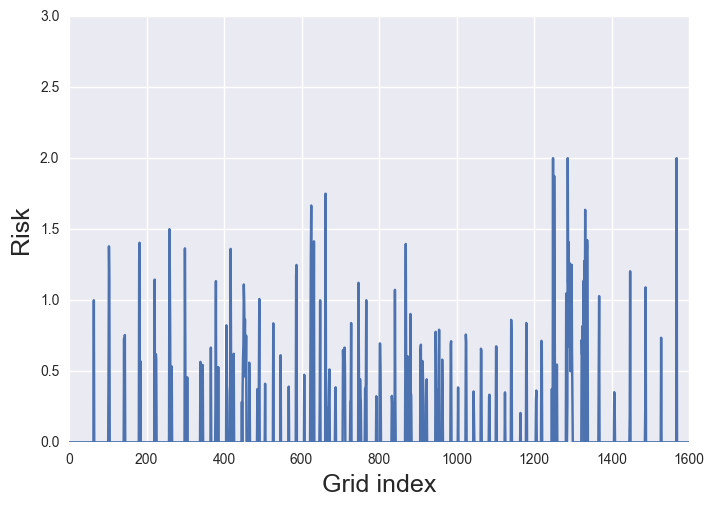

In [104]:
plt.plot(result)
plt.ylim(0, 3.0)
plt.xlabel("Grid index", size="medium")
plt.ylabel("Risk", size="medium")

# Risk graph order by route